In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import svgutils.transform as sg
import sys 
%pylab inline

matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.width'] = 2
import h5py
import qutip as qt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
with h5py.File('/home/nelson/Simulations/GRAPE-Data/transmon_pi/00038_transmon_pi.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    

    gate_time = np.array(hf.get('total_time'))
    gate_steps = np.array(hf.get('steps'))
    H0 = np.array(hf.get('H0'))
    Hops = np.array(hf.get('Hops'))
    initial_vectors_c = np.array(hf.get('initial_vectors_c'))
    dressed_info = np.array(hf.get('dressed_info'))
    uks = np.array(hf.get('uks'))[-1]
    
    inter_vecs_raw_real = np.array(hf.get('inter_vecs_raw_real'))[-1]
    inter_vecs_raw_imag = np.array(hf.get('inter_vecs_raw_imag'))[-1]
    
    inter_vecs_raw = inter_vecs_raw_real + 1j*inter_vecs_raw_imag
    
    print gate_time
    print gate_steps
    print np.shape(uks)
    
    print initial_vectors_c
    
    print inter_vecs_raw.shape
    print inter_vecs_raw_real.shape
    
#     print inter_vecs_raw[0]
#     print inter_vecs_raw[1][1]
   

('List of arrays in this file: \n', [u'H0', u'Hnames', u'Hops', u'U', u'convergence', u'error', u'final_state', u'initial_vectors_c', u'inter_vecs_imag', u'inter_vecs_mag_squared', u'inter_vecs_raw_imag', u'inter_vecs_raw_real', u'inter_vecs_real', u'iteration', u'maxA', u'method', u'reg_coeffs', u'reg_error', u'run_time', u'states_concerned_list', u'steps', u'taylor_scaling', u'taylor_terms', u'total_time', u'uks', u'unitary_scale'])
8.0
1600
(2, 1600)
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]]
(2, 4, 1601)
(2, 4, 1601)


In [3]:
print H0
initial_vectors_c.shape
for Hop in Hops:
    print Hop

[[  0.           0.           0.           0.        ]
 [  0.          24.64579437   0.           0.        ]
 [  0.           0.          47.88054868   0.        ]
 [  0.           0.           0.          69.70426293]]
[[ 0.          1.          0.          0.        ]
 [ 1.          0.          1.41421356  0.        ]
 [ 0.          1.41421356  0.          1.73205081]
 [ 0.          0.          1.73205081  0.        ]]
[[ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  0.  3.]]


In [4]:
psi0 = qt.Qobj(initial_vectors_c[0])
H0_qobj = qt.Qobj(H0)
Hops_qobj = []

for Hop in Hops:
    Hops_qobj.append(qt.Qobj(Hop))
    
print Hops_qobj

[Quantum object: dims = [[4], [4]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.          1.          0.          0.        ]
 [ 1.          0.          1.41421356  0.        ]
 [ 0.          1.41421356  0.          1.73205081]
 [ 0.          0.          1.73205081  0.        ]], Quantum object: dims = [[4], [4]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  0.  3.]]]


In [5]:
tlist = np.linspace(0,gate_time,gate_steps+1)

print tlist.shape

(1601,)


In [6]:
print uks.shape

uks_t0 = np.zeros((uks.shape[0],1))

print uks_t0

uks = numpy.hstack([uks,uks_t0])

print uks.shape

(2, 1600)
[[ 0.]
 [ 0.]]
(2, 1601)


In [7]:
dt = gate_time/gate_steps

def get_uks(t, args):
    time_id = int(t/dt)
    return uks[0][time_id]

def get_uks_2(t, args):
    time_id = int(t/dt)
    return uks[1][time_id]

In [15]:
def make_get_uks_func(id):
    def _function(t,args=None):
        time_id = int(t/dt)
        return uks[id][time_id]
    return _function

In [16]:
f0 = make_get_uks_func(0)
f1 = make_get_uks_func(1)

In [31]:
Ht_list = []
Ht_list.append(H0_qobj)

for ii in range(len(Hops)):
    Ht_list.append([Hops_qobj[ii],make_get_uks_func(ii)])
    
print Ht_list

[Quantum object: dims = [[4], [4]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[  0.           0.           0.           0.        ]
 [  0.          24.64579437   0.           0.        ]
 [  0.           0.          47.88054868   0.        ]
 [  0.           0.           0.          69.70426293]], [Quantum object: dims = [[4], [4]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.          1.          0.          0.        ]
 [ 1.          0.          1.41421356  0.        ]
 [ 0.          1.41421356  0.          1.73205081]
 [ 0.          0.          1.73205081  0.        ]], <function _function at 0x7f674be20aa0>], [Quantum object: dims = [[4], [4]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  2.  0.]
 [ 0.  0.  0.  3.]], <function _function at 0x7f674be20410>]]


In [32]:
output = qt.sesolve(Ht_list, psi0, tlist, [])

In [18]:
output = qt.sesolve([[Hops_qobj[0], f0],[Hops_qobj[1],f1], H0_qobj], psi0, tlist, [])

In [33]:
state_tlist = []
for state in output.states:
    state_tlist.append(state.full())
    
state_tlist = np.array(state_tlist)[:,:,0]
state_tlist = np.transpose(state_tlist)

In [34]:
print state_tlist.shape

(4, 1601)


In [35]:
print inter_vecs_raw[0]

[[  1.00000000e+00 +0.00000000e+00j   1.00000000e+00 +1.76328049e-10j
    1.00000000e+00 +4.14964152e-09j ...,   4.60251980e-03 -4.28824627e-04j
    4.55649057e-03 -2.33421742e-04j   4.54831077e-03 -1.58058130e-04j]
 [  0.00000000e+00 +0.00000000e+00j   5.70399970e-06 +9.24577907e-05j
    3.19692190e-05 +3.33264383e-04j ...,   9.57348228e-01 +2.88773715e-01j
    9.85584259e-01 +1.68904424e-01j   9.98871505e-01 +4.64770868e-02j]
 [  0.00000000e+00 +0.00000000e+00j  -6.02382144e-09 +7.31718797e-10j
   -7.78772105e-08 +1.48090722e-08j ...,  -1.48508127e-03 +2.19169445e-03j
   -9.53091716e-04 +2.76443223e-03j  -2.68483360e-04 +3.01892892e-03j]
 [  0.00000000e+00 +0.00000000e+00j  -5.74037888e-14 -3.19462881e-13j
   -4.18961177e-12 -1.47449900e-11j ...,   3.84586374e-03 -3.45660816e-03j
    2.43318151e-03 -4.56250366e-03j   7.28349551e-04 -5.11916913e-03j]]


In [36]:
state_tlist.shape

(4, 1601)

In [37]:
inter_vecs_raw[0].shape

(4, 1601)

In [38]:
diff = np.abs(state_tlist) - np.abs(inter_vecs_raw[0])

In [39]:
print diff.shape

(4, 1601)


In [40]:

print np.max(diff)

8.23549372387e-05


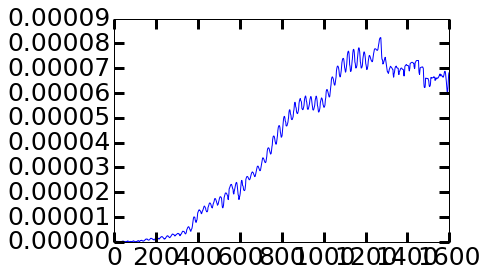

In [41]:
plt.plot(np.abs(diff)[0])

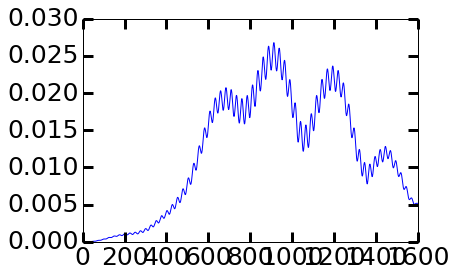

In [42]:
plt.plot(np.abs(state_tlist[3]))

In [43]:
np.allclose(state_tlist,inter_vecs_raw[0],atol=1e-03)

True